<a href="https://colab.research.google.com/github/SeonginLucasCho/DSDA-3385/blob/main/GTSRB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
!unzip GTSRB_Final_Test_Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Test/Images/07632.ppm  
  inflating: GTSRB/Final_Test/Images/07633.ppm  
  inflating: GTSRB/Final_Test/Images/07634.ppm  
  inflating: GTSRB/Final_Test/Images/07635.ppm  
  inflating: GTSRB/Final_Test/Images/07636.ppm  
  inflating: GTSRB/Final_Test/Images/07637.ppm  
  inflating: GTSRB/Final_Test/Images/07638.ppm  
  inflating: GTSRB/Final_Test/Images/07639.ppm  
  inflating: GTSRB/Final_Test/Images/07640.ppm  
  inflating: GTSRB/Final_Test/Images/07641.ppm  
  inflating: GTSRB/Final_Test/Images/07642.ppm  
  inflating: GTSRB/Final_Test/Images/07643.ppm  
  inflating: GTSRB/Final_Test/Images/07644.ppm  
  inflating: GTSRB/Final_Test/Images/07645.ppm  
  inflating: GTSRB/Final_Test/Images/07646.ppm  
  inflating: GTSRB/Final_Test/Images/07647.ppm  
  inflating: GTSRB/Final_Test/Images/07648.ppm  
  inflating: GTSRB/Final_Test/Images/07649.ppm  
  inflating: GTSRB/Final_Test/Images/07650.ppm  
  inflating: GTSRB

In [4]:
from PIL import Image
import os

# Set the paths to the input and output directories
input_dir = 'GTSRB/Final_Test/Images'
output_dir = 'GTSRB/Final_Test/ImagesPNG'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over the subdirectories in the input directory
for subdir, dirs, files in os.walk(input_dir):
  for file in files:
    # Check if the file is a PPM image
    if file.endswith('.ppm'):
      # Open the image using Pillow
      img = Image.open(os.path.join(subdir, file))
      # Convert the image to RGB mode
      img = img.convert('RGB')
      # Construct the output file path
      output_file = os.path.join(output_dir, file[:-4] + '.png')
      # Save the image as PNG
      img.save(output_file)

In [5]:
import matplotlib.pyplot as plt
import os

# Set the paths to the directories containing the images
test_image_dir = 'GTSRB/Final_Test/ImagesPNG'

# Create empty lists to store the images and labels
test_images = []
test_labels = []

# Iterate over the subdirectories in the testing image directory
for subdir, dirs, files in os.walk(test_image_dir):
    for file in files:
        # Check if the file is a PNG image
        if file.endswith('.png'):
            # Load the image using matplotlib.pyplot
            image = plt.imread(os.path.join(subdir, file))
            # Append the image to the list of images
            test_images.append(image)
            # Extract the label from the subdirectory name
            label = os.path.basename(subdir)
            # Append the label to the list of labels
            test_labels.append(label)

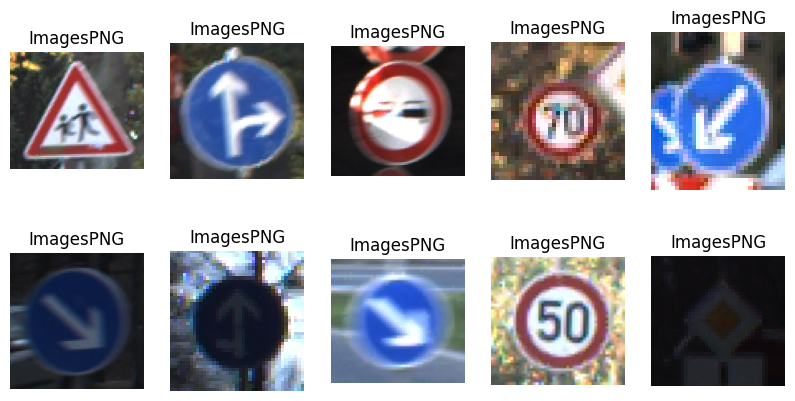

In [6]:

import matplotlib.pyplot as plt

# Display the first 10 images of the test dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(test_labels[i])
    plt.axis('off')
plt.show()

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import cv2
import numpy as np

# Convert images to NumPy arrays and resize to 32x32
test_images = [cv2.resize(np.array(img), (32, 32)) for img in test_images]

# Convert the data to PyTorch tensors
test_images = torch.tensor(test_images)

# Create a dictionary to map string labels to numerical values
label_map = {}
for i, label in enumerate(set(test_labels)):
  label_map[label] = i

# Convert labels to numerical values using the dictionary
test_labels = [label_map[label] for label in test_labels]

test_labels = torch.tensor(test_labels).long()

# Create TensorDatasets
test_dataset = TensorDataset(test_images, test_labels)

# Create DataLoaders
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

<ipython-input-7-2723932f7a8a>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  test_images = torch.tensor(test_images)


In [8]:
# Convert the data to PyTorch tensors
test_images = torch.tensor(test_images)
test_labels = torch.tensor(test_labels)

# Create TensorDatasets
test_dataset = TensorDataset(test_images, test_labels)

# Create DataLoaders
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

<ipython-input-8-45a12a902969>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_images = torch.tensor(test_images)
<ipython-input-8-45a12a902969>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(test_labels)


In [9]:
# Example of iterating over the training DataLoader
for X, y in test_dataloader:
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
    break  # Just to show the first batch

Shape of X: torch.Size([32, 32, 32, 3]), Shape of y: torch.Size([32])


In [30]:
import torch
import torch.nn as nn

# Setting the Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining the MLP Class
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(3072, 16),
            nn.ReLU(),
            nn.Linear(16, 10)
        )
# Forward Pass Definition
    def forward(self, x):
        return self.layers(x)
# Instantiating the Model
model = MLP()
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [32]:
def test(data_loader, model, criterion, optimizer):
    model.eval()

    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    total_loss = 0
    total_correct = 0
    for data, target in data_loader:
        # Copy data and targets to GPU
        data = data.to(device)
        target = target.to(device)

        # Reshape the input data
        data = data.view(data.size(0), -1)

        # Do a forward pass
        output = model(data)

        # Calculate the loss

        loss = criterion(output, target)
        total_loss += loss

        # Count number of correct digits


        total_correct += (torch.argmax(output,dim = 1)== target).sum().item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    test_loss = total_loss/num_batches
    test_accuracy = total_correct/num_items

    print(f"Average loss: {test_loss:7f}, accuracy: {test_accuracy:.2%}")

In [33]:
epochs = 10
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    test(test_dataloader, model, criterion, optimizer)

Training epoch: 1
Average loss: 0.028239, accuracy: 99.75%
Training epoch: 2
Average loss: 0.000731, accuracy: 100.00%
Training epoch: 3
Average loss: 0.000288, accuracy: 100.00%
Training epoch: 4
Average loss: 0.000154, accuracy: 100.00%
Training epoch: 5
Average loss: 0.000094, accuracy: 100.00%
Training epoch: 6
Average loss: 0.000062, accuracy: 100.00%
Training epoch: 7
Average loss: 0.000043, accuracy: 100.00%
Training epoch: 8
Average loss: 0.000031, accuracy: 100.00%
Training epoch: 9
Average loss: 0.000023, accuracy: 100.00%
Training epoch: 10
Average loss: 0.000017, accuracy: 100.00%
